In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
train=pd.read_csv("/Users/bruce/Desktop/datasets/wine_quality/winequality-red.csv")

In [3]:
train.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

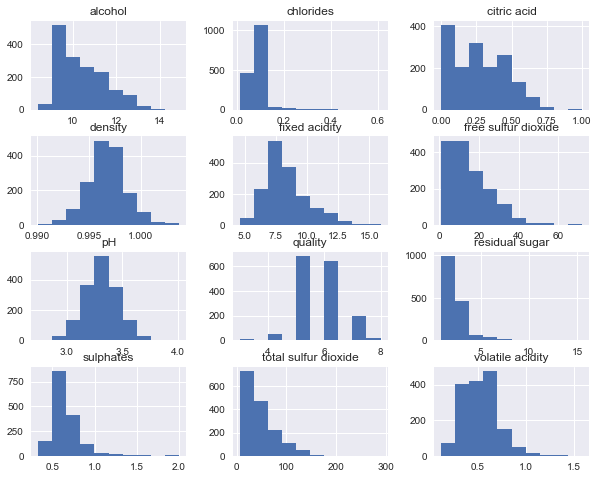

In [5]:
train.hist(figsize=(10,8))
plt.show()

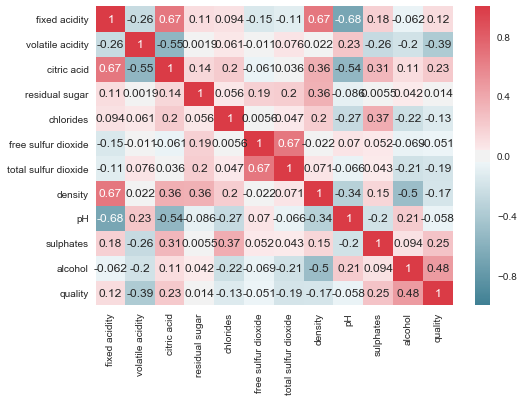

In [6]:
corr=train[train.columns].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap,annot=True)
sns.plt.show()

In [7]:
features=train.drop("quality",axis=1)
outcomes=train["quality"].values
features.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [8]:
for i in features.columns: 
    scaler = preprocessing.StandardScaler()
    train[i] = scaler.fit_transform(train[i])

/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, outcomes, test_size=0.25, random_state=10)

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [56]:
model=RandomForestClassifier(n_estimators=5)
kfold = KFold(n_splits=10, random_state=0)
cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
results=["Ranom Forest",cv_result.mean(),cv_result.std()]

print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[0] , results[1] * 100, results[2] * 100))



Ranom Forest         63.72 (+/-) 3.30 


In [57]:
final_model = RandomForestClassifier(n_estimators=100,max_features='auto',bootstrap=True,oob_score=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[  0   0   1   1   0   0]
 [  0   0  11   4   0   0]
 [  0   0 117  55   0   0]
 [  0   0  41 110   1   0]
 [  0   0   2  36  12   0]
 [  0   0   0   7   2   0]]
59.75
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        15
          5       0.68      0.68      0.68       172
          6       0.52      0.72      0.60       152
          7       0.80      0.24      0.37        50
          8       0.00      0.00      0.00         9

avg / total       0.59      0.60      0.57       400



/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
final_model = RandomForestClassifier(n_estimators=1,max_features=None,bootstrap=False,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[  0   0   1   1   0   0]
 [  0   0   9   6   0   0]
 [  0   1 102  68   1   0]
 [  0   1  34 109   8   0]
 [  0   0   1  37  12   0]
 [  0   0   0   8   1   0]]
55.75
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        15
          5       0.69      0.59      0.64       172
          6       0.48      0.72      0.57       152
          7       0.55      0.24      0.33        50
          8       0.00      0.00      0.00         9

avg / total       0.55      0.56      0.53       400



In [59]:
final_model = RandomForestClassifier(n_estimators=100,max_features=None,bootstrap=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[  0   0   1   1   0   0]
 [  0   0  12   3   0   0]
 [  0   0 116  54   2   0]
 [  0   0  35 109   8   0]
 [  0   0   1  36  13   0]
 [  0   0   0   6   3   0]]
59.5
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        15
          5       0.70      0.67      0.69       172
          6       0.52      0.72      0.60       152
          7       0.50      0.26      0.34        50
          8       0.00      0.00      0.00         9

avg / total       0.56      0.59      0.57       400



In [78]:
from xgboost import XGBClassifier

final_model = XGBClassifier(n_estimators=200,num_boost_round=1,max_depth=4,subsample=0.632,colsample_bytree=0.8)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)





[[  0   1   1   0   0   0]
 [  0   0  10   5   0   0]
 [  0   3 132  37   0   0]
 [  0   2  39 101  10   0]
 [  0   0   2  19  29   0]
 [  0   0   0   5   4   0]]
65.5
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        15
          5       0.72      0.77      0.74       172
          6       0.60      0.66      0.63       152
          7       0.67      0.58      0.62        50
          8       0.00      0.00      0.00         9

avg / total       0.62      0.66      0.64       400



In [71]:
from xgboost import XGBClassifier

final_model = XGBClassifier(n_estimators=1,num_boost_round=1,max_depth=4,subsample=1,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)



[[  0   0   2   0   0   0]
 [  0   2  10   3   0   0]
 [  1   0 103  63   5   0]
 [  0   1  35 107   9   0]
 [  0   0   4  35  11   0]
 [  0   0   0   6   3   0]]
55.75
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.67      0.13      0.22        15
          5       0.67      0.60      0.63       172
          6       0.50      0.70      0.58       152
          7       0.39      0.22      0.28        50
          8       0.00      0.00      0.00         9

avg / total       0.55      0.56      0.54       400



In [83]:
from xgboost import XGBClassifier

final_model = XGBClassifier(n_estimators=200,num_boost_round=1,max_depth=4,subsample=0.632,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[  0   0   2   0   0   0]
 [  0   0  11   4   0   0]
 [  0   2 133  36   1   0]
 [  0   2  32 106  12   0]
 [  0   0   2  18  30   0]
 [  0   0   0   5   4   0]]
67.25
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        15
          5       0.74      0.77      0.76       172
          6       0.63      0.70      0.66       152
          7       0.64      0.60      0.62        50
          8       0.00      0.00      0.00         9

avg / total       0.64      0.67      0.65       400



In [34]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.layers import Dense, Activation, Dropout,Input
from keras import optimizers
history=History()

In [35]:
m = Sequential()
m.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(len(np.unique(Y_train)), activation='softmax'))
    
m.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [36]:
hist=m.fit(
    # Feature matrix
    X_train.values, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=125),
        history,
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.1,
    batch_size=256, 
)

Train on 1079 samples, validate on 120 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 1.22678, saving model to best.model
0s - loss: 1.7595 - acc: 0.2994 - val_loss: 1.2268 - val_acc: 0.4083
Epoch 2/200
Epoch 00001: val_loss improved from 1.22678 to 1.16863, saving model to best.model
0s - loss: 1.4149 - acc: 0.3791 - val_loss: 1.1686 - val_acc: 0.4333
Epoch 3/200
Epoch 00002: val_loss improved from 1.16863 to 1.13666, saving model to best.model
0s - loss: 1.3669 - acc: 0.4152 - val_loss: 1.1367 - val_acc: 0.4333
Epoch 4/200
Epoch 00003: val_loss improved from 1.13666 to 1.10153, saving model to best.model
0s - loss: 1.3183 - acc: 0.4263 - val_loss: 1.1015 - val_acc: 0.4667
Epoch 5/200
Epoch 00004: val_loss improved from 1.10153 to 1.09401, saving model to best.model
0s - loss: 1.3181 - acc: 0.4198 - val_loss: 1.0940 - val_acc: 0.4083
Epoch 6/200
Epoch 00005: val_loss improved from 1.09401 to 1.08843, saving model to best.model
0s - loss: 1.3009 - acc: 0.4291 - val_loss

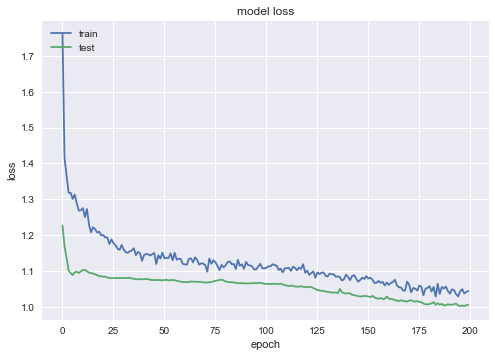

In [37]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
m.load_weights("best.model")
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in m.predict(X_test.values).argmax(axis=1)]
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[  0   0   1   1   0   0]
 [  0   0  11   4   0   0]
 [  0   0 108  64   0   0]
 [  0   0  43 109   0   0]
 [  0   0   4  44   2   0]
 [  0   0   0   9   0   0]]
54.75
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        15
          5       0.65      0.63      0.64       172
          6       0.47      0.72      0.57       152
          7       1.00      0.04      0.08        50
          8       0.00      0.00      0.00         9

avg / total       0.58      0.55      0.50       400



In [16]:
len(train.columns)

12

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.models import Model
import keras
history = History()


input_1 = Input(shape=(1,))
input_2 = Input(shape=(1,))
input_3 = Input(shape=(1,))
input_4 = Input(shape=(1,))
input_5 = Input(shape=(1,))
input_6 = Input(shape=(1,))
input_7 = Input(shape=(1,))
input_8 = Input(shape=(1,))
input_9 = Input(shape=(1,))
input_10 = Input(shape=(1,))
input_11= Input(shape=(1,))









hidden_1 = Dense(32, activation='sigmoid')(input_1)
hidden_2 = Dense(32, activation='sigmoid')(input_2)
hidden_3 = Dense(32, activation='sigmoid')(input_3)
hidden_4 = Dense(32, activation='sigmoid')(input_4)
hidden_5 = Dense(32, activation='sigmoid')(input_5)
hidden_6 = Dense(32, activation='sigmoid')(input_6)
hidden_7 = Dense(32, activation='sigmoid')(input_7)
hidden_8 = Dense(32, activation='sigmoid')(input_8)
hidden_9 = Dense(32, activation='sigmoid')(input_9)
hidden_10 = Dense(32, activation='sigmoid')(input_10)
hidden_11 = Dense(32, activation='sigmoid')(input_11)




value_list=[X_train[['fixed acidity']].values,
            X_train[['volatile acidity']].values,
            X_train[['citric acid']].values,
            X_train[['residual sugar']].values,
            X_train[['chlorides']].values,
            X_train[['free sulfur dioxide']].values,
            X_train[['total sulfur dioxide']].values,
            X_train[['density']].values,
            X_train[['pH']].values,
            X_train[['sulphates']].values,
            X_train[['alcohol']].values
           ]

value_list_test=[X_test[['fixed acidity']].values,
            X_test[['volatile acidity']].values,
            X_test[['citric acid']].values,
            X_test[['residual sugar']].values,
            X_test[['chlorides']].values,
            X_test[['free sulfur dioxide']].values,
            X_test[['total sulfur dioxide']].values,
            X_test[['density']].values,
            X_test[['pH']].values,
            X_test[['sulphates']].values,
            X_test[['alcohol']].values
           ]



x = keras.layers.concatenate([hidden_1, hidden_2,hidden_3,hidden_4,hidden_5,
                              hidden_6,hidden_7,hidden_8,hidden_9,hidden_10,hidden_11])

x = Dense(96, activation='sigmoid')(x)
output = Dense(len(np.unique(Y_train)), activation='softmax')(x)

model = Model(inputs=[input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,input_10,input_11], outputs=[output])
model.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

hist=model.fit(
    # Feature matrix
    value_list, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        history,
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.1,
    batch_size=32, 
)



Train on 1079 samples, validate on 120 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 1.11254, saving model to best.model
0s - loss: 1.3690 - acc: 0.3939 - val_loss: 1.1125 - val_acc: 0.4333
Epoch 2/200
Epoch 00001: val_loss did not improve
0s - loss: 1.1878 - acc: 0.4124 - val_loss: 1.1156 - val_acc: 0.4083
Epoch 3/200
Epoch 00002: val_loss improved from 1.11254 to 1.10585, saving model to best.model
0s - loss: 1.1763 - acc: 0.4161 - val_loss: 1.1059 - val_acc: 0.4000
Epoch 4/200
Epoch 00003: val_loss did not improve
0s - loss: 1.1726 - acc: 0.4374 - val_loss: 1.1183 - val_acc: 0.4083
Epoch 5/200
Epoch 00004: val_loss did not improve
0s - loss: 1.1770 - acc: 0.4078 - val_loss: 1.1314 - val_acc: 0.4333
Epoch 6/200
Epoch 00005: val_loss improved from 1.10585 to 1.09794, saving model to best.model
0s - loss: 1.1679 - acc: 0.4347 - val_loss: 1.0979 - val_acc: 0.4417
Epoch 7/200
Epoch 00006: val_loss did not improve
0s - loss: 1.1509 - acc: 0.4736 - val_loss: 1.1118 - val_a

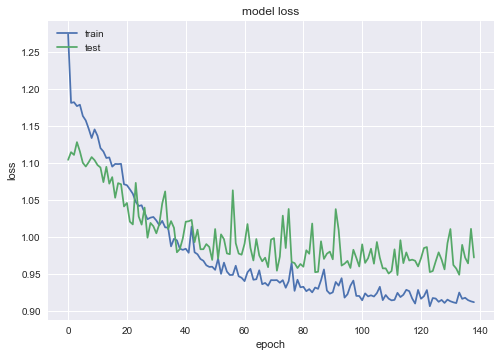

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
model.load_weights("best.model")
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in model.predict(value_list_test).argmax(axis=1)]

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[  0   0   1   1   0   0]
 [  0   0  13   2   0   0]
 [  0   0 132  39   1   0]
 [  0   0  60  75  17   0]
 [  0   0   3  25  22   0]
 [  0   0   0   4   5   0]]
57.25
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        15
          5       0.63      0.77      0.69       172
          6       0.51      0.49      0.50       152
          7       0.49      0.44      0.46        50
          8       0.00      0.00      0.00         9

avg / total       0.53      0.57      0.55       400

